1/1 [==============================] - 0s 33ms/step


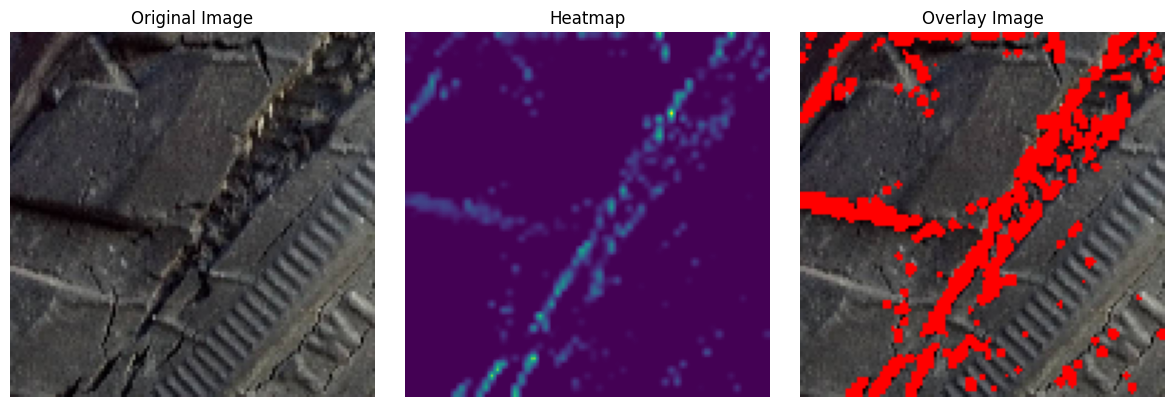

In [10]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras import models


model = models.load_model('improved_cnn_model.h5')

image_path = r'D:\projects\projectschool21\Tire Textures\testing_data\cracked\Cracked-208.jpg'
img = load_img(image_path, target_size=(128, 128))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  


visualization_models = [models.Model(inputs=model.input, outputs=layer.output) for layer in model.layers]


target_layer = 2

if target_layer < len(visualization_models):

    feature_maps = visualization_models[target_layer].predict(img_array)


    if len(feature_maps.shape) == 4:
        heatmap = feature_maps[0, :, :, 0] 
    else:
        raise ValueError(f"Unexpected feature_maps shape: {feature_maps.shape}")


        heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap) + 1e-8)


    heatmap_resized = cv2.resize(heatmap, (img_array.shape[2], img_array.shape[1]))


    threshold = 0.6
    dark_areas = heatmap_resized < threshold


    overlay_img = np.uint8(img_array[0].copy())


    overlay_img[~dark_areas, :] = [255, 0, 0]  # Red color


    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(heatmap_resized, cmap='viridis')
    plt.title('Heatmap')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(overlay_img)
    plt.title('Overlay Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print(f"Invalid target_layer index. Choose a value between 0 and {len(visualization_models) - 1}.")
